# Day 17

## Part 1

- rocks fall! ...everyone hopefuly doesn't die
- rocks fall in the same order: `-`, `+`, `J`, `|`, `o`
- the rocks don't spin but can translate left and right
- this is all in a vertical chamber that is 7 units wide
- rocks appear such that it's left edge is 2 units from the left wall and it's bottom is 3 units above the highest rock in the room/the floor.
- rocks alternate between being pushed by hot gas and falling
- if a rock would move into a wall or the floor or another rock it doesn't
- a new rock appears immediately after the last rock stops being able to fall further

`How many units tall will the tower of rocks be after 2022 rocks have stopped falling?`

In [34]:
from copy import deepcopy
from dataclasses import dataclass
from itertools import cycle
from matplotlib import pyplot as plt
import time
from utils import parse_from_file, ParseConfig

parser = ParseConfig('', str)

rock_moves = cycle(parse_from_file('day_17.txt', parser))

print(''.join([move for move, _ in zip(deepcopy(rock_moves), range(10))]))

>>>><>>><<


In [35]:
air = 0
static_rock = 1
moving_rock = 2

CHAMBER_WIDTH = 7

# the coordinates of each rock refereced to the lower left corner
rocks = cycle((
    ((0, 0), (1, 0), (2, 0), (3, 0)),  # -
    ((1, 0), (0, 1), (1, 1), (2, 1), (1, 2)),  # +
    ((0, 0), (1, 0), (2, 0), (2, 1), (2, 2)),  # J
    ((0, 0), (0, 1), (0, 2), (0, 3)),  # |
    ((0, 0), (1, 0), (0, 1), (1, 1))  # o
))

In [36]:
def chamber_with_rock(
    chamber: list[list[int]], rock: tuple[tuple[int]], position: tuple[int]
) -> list[list[int]]:
    """
    returns a copy of the chamber with the rock in the position passed for the
    purpose of plotting.
    """
    temp_chamber = deepcopy(chamber)
    px, py = position
    for x, y in rock:
        temp_chamber[y + py][x + px] = moving_rock
    return temp_chamber

Text(0.5, 0.98, "Let's get ready to rrrock!")

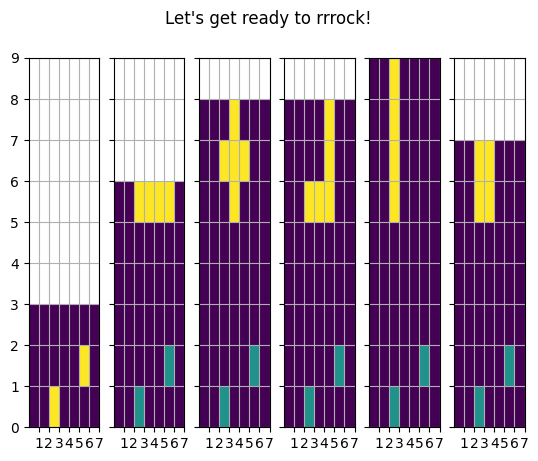

In [37]:
def get_chamber_extension(
    chamber: list[list[int]], rock: tuple[tuple[int]]
) -> tuple[list[list[int]], tuple[int]]:
    """
    returns the new rows required (not appended in this call) for a new rock
    and the coordinates of it's lower left corner
    """
    row_buffer_height = 3
    existing_empty_rows = sum(
        [all([space == air for space in row]) for row in reversed(chamber)])
    rock_height = max([y for _, y in rock]) + 1

    extension = [
        [air for _ in range(CHAMBER_WIDTH)]
        for __ in range(rock_height + row_buffer_height - existing_empty_rows)
    ]
    start_pos = (2, len(chamber) - existing_empty_rows + row_buffer_height)

    return extension, start_pos

test_chamber = [
    [air, air, static_rock, air, air, air, air],
    [air, air, air, air, air, static_rock, air],
    [air, air, air, air, air, air, air],
]

fig, _ = plt.subplots(nrows=1, ncols=6, sharey=True, sharex=True)
fig.axes[0].pcolormesh(test_chamber)
fig.axes[0].grid('ON')
for _, rock, ax in zip(range(5), deepcopy(rocks), fig.axes[1:]):
    temp_chamber = deepcopy(test_chamber)
    new_rows, start = get_chamber_extension(temp_chamber, rock)
    temp_chamber += new_rows
    ax.pcolormesh(chamber_with_rock(temp_chamber, rock, start))
    ax.grid('ON')
    ax.set_xticks(range(1, 8))
fig.suptitle('Let\'s get ready to rrrock!')

In [38]:
# wrote this func to help debug
def plot_snapshots(snapshots: list[list[list[int]]]):
    """
    creates a plot of the snapshots passed
    """
    fig, axes = plt.subplots(
        nrows=1, ncols=len(snapshots), sharey=True, sharex=True)
    for ax, snapshot in zip(fig.axes, snapshots):
        ax.pcolormesh(snapshot)
        ax.grid('ON')
        ax.set_xticks(range(1, 8))
        ax.set_yticks(range(1, len(snapshot)))
    fig.suptitle('Snapshots')

In [39]:
def run_rock_sim(
    nrocks: int, rock_moves: cycle, chamber_snapshots: bool = False
) -> list[list[int]]:
    """
    runs the rock simulation for nrocks

    captures a snapshot when each new piece is added if specified
    """
    # ok let's run this and see what we get
    chamber = []
    snapshots = []
    moves = deepcopy(rock_moves)
    for _, rock in zip(range(nrocks), deepcopy(rocks)):
        # pop a new rock into the chamber
        new_rows, (x, y) = get_chamber_extension(chamber, rock)
        # print()
        keep_falling = True
        chamber += new_rows
        if chamber_snapshots:
            snapshots.append(chamber_with_rock(chamber, rock, (x, y)))
        while keep_falling:
            # update stopped check
            keep_falling = False
            # lateral movement
            move = next(moves)
            if move == '>' and all([]):
                for part_x, part_y in rock:
                    temp_x = part_x + x + 1
                    if temp_x >= CHAMBER_WIDTH:
                        # print(move, 'right wall')
                        break
                    if chamber[y + part_y][temp_x] == static_rock:
                        # print(move, 'right rock')
                        break
                else:
                    x += 1
            elif move == '<':
                for part_x, part_y in rock:
                    temp_x = part_x + x - 1
                    if temp_x < 0:
                        # print(move, 'left wall')
                        break
                    if chamber[y + part_y][temp_x] == static_rock:
                        # print(move, 'left rock')
                        break
                else:
                    x -= 1
            # vertical movement
            # print(move, x, y)
            for part_x, part_y in rock:
                temp_y = y + part_y - 1
                if temp_y < 0:
                    # print('v', 'hit bottom')
                    break
                if chamber[temp_y][x + part_x] == static_rock:
                    # print('v', 'hit rock')
                    break
            else:
                y -= 1
                keep_falling = True
        # add the moving rock to the chamber
        for part_x, part_y in rock:
            chamber[y + part_y][x + part_x] = static_rock
    if chamber_snapshots:
        plot_snapshots(snapshots)
    return chamber

chamber = run_rock_sim(2022, rock_moves)

In [40]:
_, (_, next_y) = get_chamber_extension(chamber, ((0, 0), ))

top_of_the_rocks = next_y - 3

print(f'the rock pile reached a height of: {top_of_the_rocks}!')

the rock pile reached a height of: 3092!


## Part 2

- do the same but for `1,000,000,000,000` rocks o.o

In [41]:
# perhaps we can find a repeating point, after which we get the same thing over
# and over and can then just do a bit extra to fill in the end
moves = parse_from_file('day_17.txt', parser)
total_moves = len(moves)

print(f'the total number of moves before we repeat is: {total_moves}')

the total number of moves before we repeat is: 10091


In [42]:
# run and save every time a rock becomes static:
# rock number, rock type, resting x coord, rock move index
# if we can find a matching set of results at 2 different rock numbers, that's it

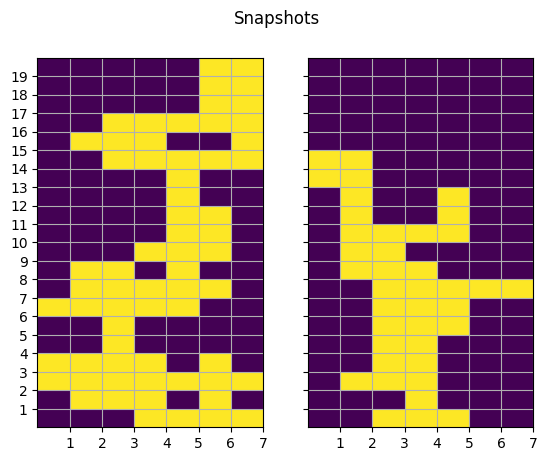

In [70]:
@dataclass
class RockStats:
    rock_type: str
    resting_x: int
    move_index: int

rock_types = cycle(range(5))

def run_rock_sim_with_stats(
    nrocks: int, start_chamber: list[list[int]], rock_moves: cycle,
    start_rock_move: int, rocks: cycle, start_rock_type: int
) -> list[list[int]]:
    """
    runs the rock simulation for nrocks

    starting chamber, rock_types and moves can be specified to pick up where
    we left off
    """
    # ok let's run this and see what we get
    chamber = deepcopy(start_chamber)
    moves = deepcopy(rock_moves)
    for _ in range(start_rock_move):
        next(moves)
    rocks = deepcopy(rocks)
    for _ in range(start_rock_type):
        next(rocks)
    move_index = start_rock_move
    stats = []
    for _, rock_type, rock in zip(
            range(1, nrocks + 1), deepcopy(rock_types), deepcopy(rocks)):
        # pop a new rock into the chamber
        new_rows, (x, y) = get_chamber_extension(chamber, rock)
        # print()
        keep_falling = True
        chamber += new_rows

        while keep_falling:
            # update stopped check
            keep_falling = False
            # lateral movement
            move = next(moves)
            move_index += 1
            if move_index >= total_moves:
                move_index = 0

            if move == '>' and all([]):
                for part_x, part_y in rock:
                    temp_x = part_x + x + 1
                    if temp_x >= CHAMBER_WIDTH:
                        # print(move, 'right wall')
                        break
                    if chamber[y + part_y][temp_x] == static_rock:
                        # print(move, 'right rock')
                        break
                else:
                    x += 1
            elif move == '<':
                for part_x, part_y in rock:
                    temp_x = part_x + x - 1
                    if temp_x < 0:
                        # print(move, 'left wall')
                        break
                    if chamber[y + part_y][temp_x] == static_rock:
                        # print(move, 'left rock')
                        break
                else:
                    x -= 1
            # vertical movement
            # print(move, x, y)
            for part_x, part_y in rock:
                temp_y = y + part_y - 1
                if temp_y < 0:
                    # print('v', 'hit bottom')
                    break
                if chamber[temp_y][x + part_x] == static_rock:
                    # print('v', 'hit rock')
                    break
            else:
                y -= 1
                keep_falling = True
        # add the moving rock to the chamber
        stats.append(RockStats(rock_type, x, move_index))
        for part_x, part_y in rock:
            chamber[y + part_y][x + part_x] = static_rock
    return chamber, rocks, moves, stats

chamber, rocks, moves, stats = run_rock_sim_with_stats(
        2000, [], rock_moves, 0, rocks, 0)
plot_snapshots([chamber[:20], chamber[-20:]])

In [74]:
# with the modified simulation func we can now check in periodically to see
# if we've got any matches
def find_matching_stats(stats: list[RockStats]) -> tuple[int]|None:
    """
    returns a tuple of ints if any stats match, else returns None
    """
    for index_a, stat_a in enumerate(stats):
        for index_b, stat_b in enumerate(stats):
            if stat_a == stat_b:
                return index_a, index_b
    return None

stat_chamber = []
stat_rocks = deepcopy(rocks)
rock_type = 0
stat_moves = deepcopy(moves)
move_count = 0
stats = []

result = None
rocks_simulated = 0
while result is None:
    try:
        stat_chamber, stat_rocks, stat_moves, new_stats = \
            run_rock_sim_with_stats(
                    10000, [], stat_moves, move_count, rocks, rock_type)
    except KeyboardInterrupt:
        break
    stats += new_stats
    results = find_matching_stats(stats)
    rocks_simulated += 10000
    print(f'rocks simulated: {rocks_simulated}', end='\r')
    move_count = stats[-1].move_index
    rock_type = stats[-1].rock_type

RockStats(rock_type=2, resting_x=2, move_index=5859)
RockStats(rock_type=3, resting_x=4, move_index=5863)
RockStats(rock_type=4, resting_x=4, move_index=5867)
RockStats(rock_type=0, resting_x=0, move_index=5879)
RockStats(rock_type=1, resting_x=4, move_index=5883)
RockStats(rock_type=2, resting_x=2, move_index=5888)
RockStats(rock_type=3, resting_x=4, move_index=5892)


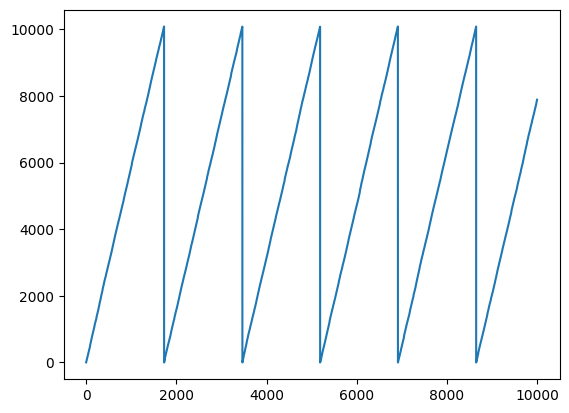

In [72]:
for stat in stats[997:1004]:
    print(stat)
fig, ax = plt.subplots()
ax.plot([rock.move_index for rock in stats])